# Cifar-100 이미지 분류
## 전체 데이터 사용
### 모델 출처: [Divya Agarwal](https://github.com/divya025/Cifar100)

#### CIFAR100 데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

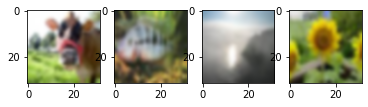

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [5]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding

In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

#### 모형 구현

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Activation
import numpy as np

np.random.seed(0)

In [9]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [10]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [12]:
## to save checkpoint to use later
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

modelpath = "model/Cifar-100-best.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)

In [13]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=50, 
                    callbacks=[checkpointer, early_stopping_callback],
                    validation_data=(X_test, Y_test), verbose=1)

Epoch 1/50
 997/1000 [============================>.] - ETA: 0s - loss: 4.3400 - accuracy: 0.0421
Epoch 00001: val_loss improved from inf to 3.93991, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 11s 11ms/step - loss: 4.3391 - accuracy: 0.0421 - val_loss: 3.9399 - val_accuracy: 0.1219
Epoch 2/50
 997/1000 [============================>.] - ETA: 0s - loss: 3.8616 - accuracy: 0.1098
Epoch 00002: val_loss improved from 3.93991 to 3.59852, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 10s 10ms/step - loss: 3.8617 - accuracy: 0.1098 - val_loss: 3.5985 - val_accuracy: 0.1750
Epoch 3/50
 997/1000 [============================>.] - ETA: 0s - loss: 3.6363 - accuracy: 0.1472
Epoch 00003: val_loss improved from 3.59852 to 3.39866, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 10s 10ms/step - loss: 3.6359 - accuracy: 0.1473 - val_loss: 3.3987 - val_accuracy: 0.2039
Epoch 4/50


Epoch 26/50
 997/1000 [============================>.] - ETA: 0s - loss: 2.2807 - accuracy: 0.4093
Epoch 00026: val_loss improved from 2.31077 to 2.28371, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 10s 10ms/step - loss: 2.2808 - accuracy: 0.4093 - val_loss: 2.2837 - val_accuracy: 0.4212
Epoch 27/50
 997/1000 [============================>.] - ETA: 0s - loss: 2.2582 - accuracy: 0.4146
Epoch 00027: val_loss improved from 2.28371 to 2.25913, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 10s 10ms/step - loss: 2.2580 - accuracy: 0.4147 - val_loss: 2.2591 - val_accuracy: 0.4250
Epoch 28/50
 996/1000 [============================>.] - ETA: 0s - loss: 2.2259 - accuracy: 0.4186
Epoch 00028: val_loss improved from 2.25913 to 2.25463, saving model to model/Cifar-100-best.hdf5
1000/1000 [==============================] - 10s 10ms/step - loss: 2.2258 - accuracy: 0.4186 - val_loss: 2.2546 - val_accuracy: 0.4239
Epoc

In [14]:
from tensorflow.keras.models import load_model
del model
model = load_model('model/Cifar-100-best.hdf5')

#### 모델 평가하기

In [15]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 2s 5ms/step - loss: 2.0501 - accuracy: 0.4716

 Test Accuracy: 0.4716


#### 그래프 그리기

In [16]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

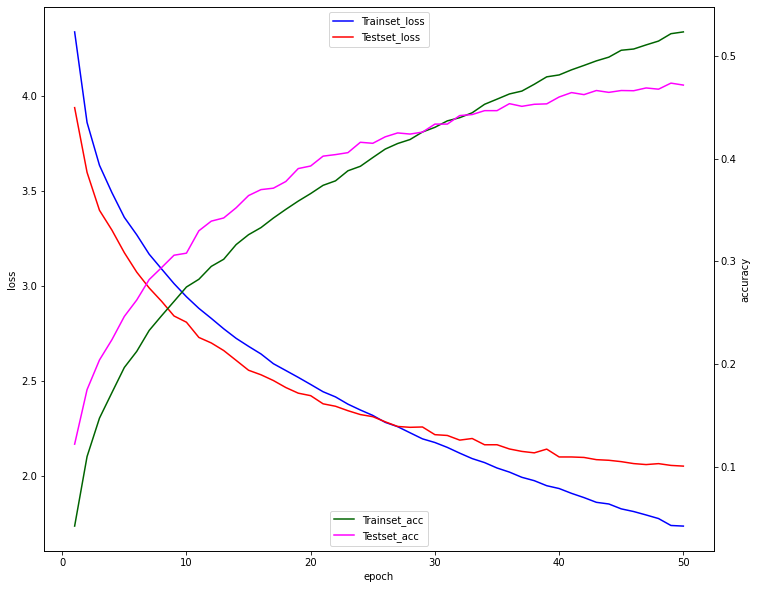

In [17]:
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(12,10))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()

#### 모델 저장하기